In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [5]:
my_year = 2020
my_month = 7
my_day = 4
my_hour = 9
my_minute = 25
my_second = 35

In [6]:
my_date = datetime(my_year, my_month, my_day)

In [7]:
my_date

datetime.datetime(2020, 7, 4, 0, 0)

In [8]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [9]:
my_date_time

datetime.datetime(2020, 7, 4, 9, 25, 35)

In [11]:
first_two = [datetime(2016, 7, 20), datetime(2016, 8, 10)]

In [12]:
first_two

[datetime.datetime(2016, 7, 20, 0, 0), datetime.datetime(2016, 8, 10, 0, 0)]

In [13]:
dt_ind = pd.DatetimeIndex(first_two)

In [14]:
dt_ind

DatetimeIndex(['2016-07-20', '2016-08-10'], dtype='datetime64[ns]', freq=None)

In [15]:
data = np.random.randn(2,2)

In [17]:
cols = ['a','b']

In [18]:
df = pd.DataFrame(data, dt_ind, cols)

In [19]:
df

,a,b
2016-07-20,-2.405059,-1.218051
2016-08-10,-0.625775,-0.213906


# Walmart Stock Table

In [20]:
df = pd.read_csv('walmart_stock.csv')

In [41]:
df.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [25]:
# Date is an object here and should be changed to the DateTime format
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [27]:
# Date also should act as the index
df.set_index('Date', inplace=True)

In [29]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [30]:
# A Better Way:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)

In [32]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [33]:
# 'resample' looks like 'groupby' with different types of parameters
df.resample(rule='A').mean() # 'A' means yearly

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


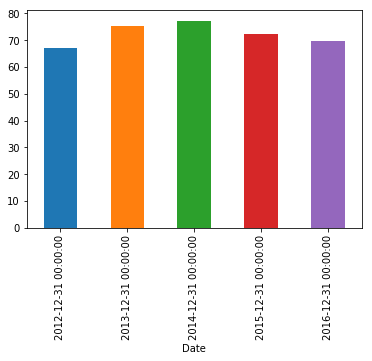

In [34]:
df['Close'].resample('A').mean().plot(kind='bar')

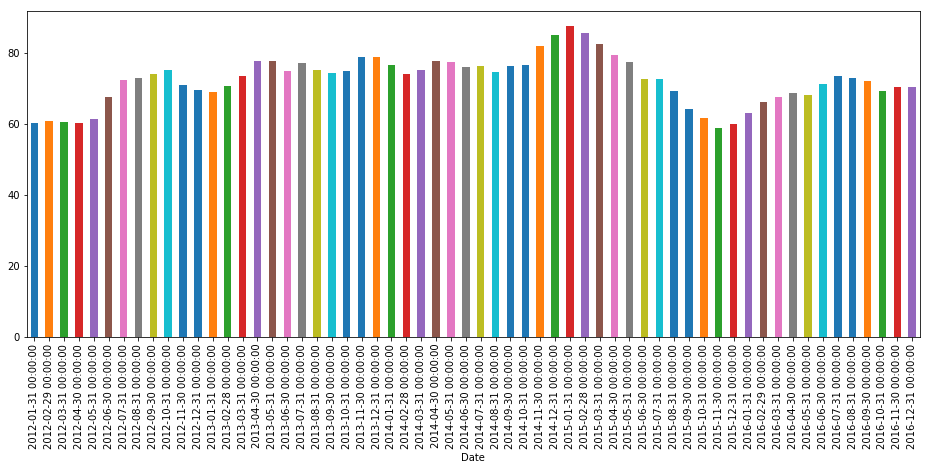

In [36]:
df['Close'].resample('M').mean().plot(kind='bar', figsize=(16,6))

In [38]:
#df.shift(periods=1) shifts one row down (here one day)
#df.tshift(freq='M') all entries in a month 'M' shifts to the end day of the month

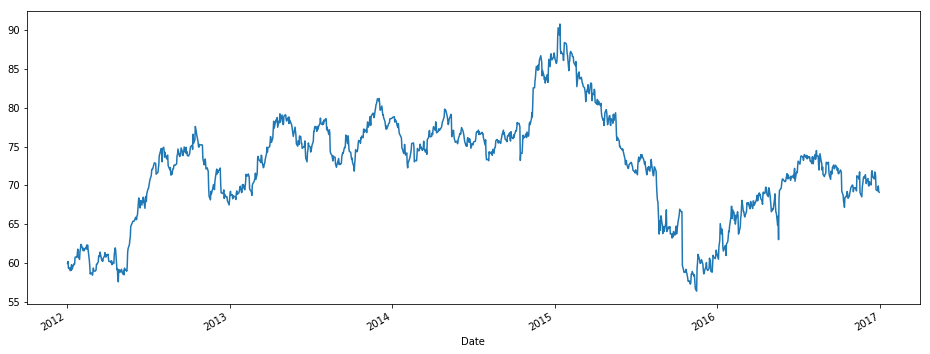

In [39]:
df['Open'].plot(figsize=(16,6))

In [40]:
df.rolling(7).mean().head(20) # 'rolling' looks like 'groupby' for a period of time

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


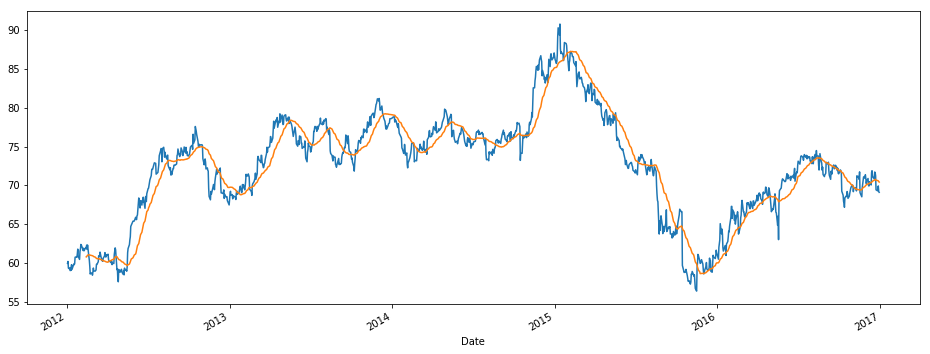

In [46]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6)) # much more smooth curve

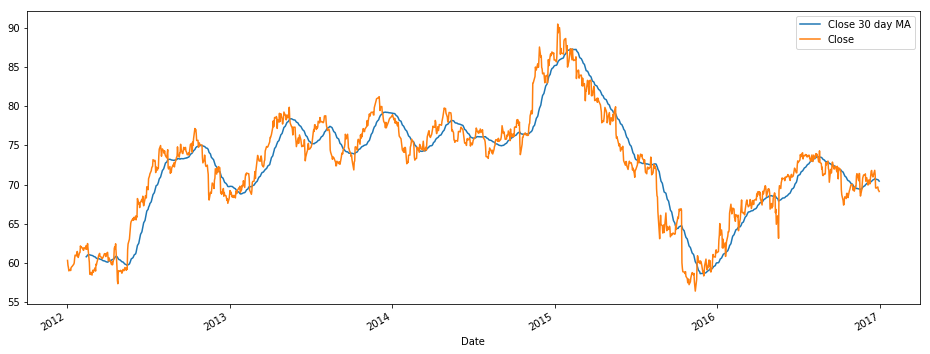

In [48]:
df['Close 30 day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 day MA', 'Close']].plot(figsize=(16,6))

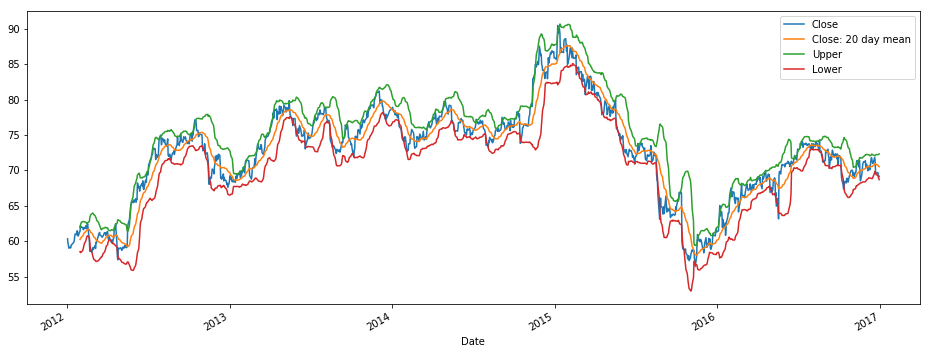

In [53]:
# Bollinger Band
df['Close: 20 day mean'] = df['Close'].rolling(20).mean()
df['Upper'] = df['Close: 20 day mean'] + 2 * df['Close'].rolling(20).std()
df['Lower'] = df['Close: 20 day mean'] - 2 * df['Close'].rolling(20).std()
df[['Close','Close: 20 day mean','Upper','Lower']].plot(figsize=(16,6))

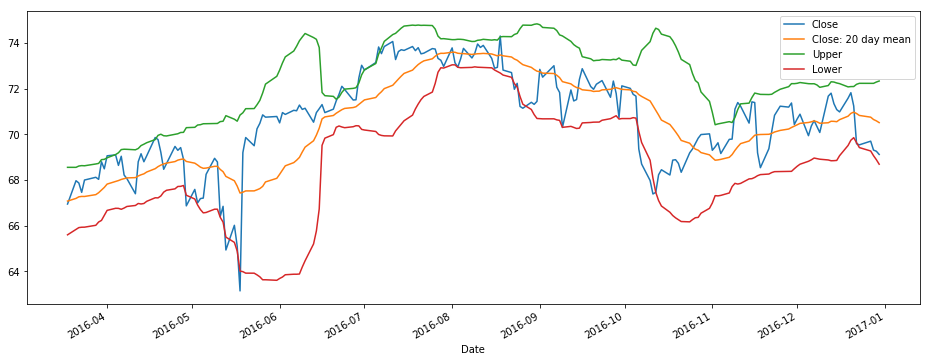

In [54]:
df[['Close','Close: 20 day mean','Upper','Lower']].tail(200).plot(figsize=(16,6))